# ***EDA ON TITANIC DATASET***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Exploraring the data**

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
pd.DataFrame(data.isna().sum().sort_values(ascending=False)/len(data)*100)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000




***brief description of each column***

    PassengerId -- passenger identifiation unique ID
    Survived -- Survivor flag (0 = dead, 1 = survived)
    Pclass -- ticket class:
        1 = Upper Class
        2 = Middle Class
        3 = Lower Class
    Name -- as is
    Sex -- as is
    Age -- as is
    SibSp -- number of siblings/spouses on Titanic
    Parch -- number of parents/children on Titanic
    Ticket -- ticket number
    Fare -- price
    Cabin -- Cabin number
    Embarked -- port of departure
        S = Southampton
        C = Cherbourg
        Q = Queenstown



<function matplotlib.pyplot.show(close=None, block=None)>

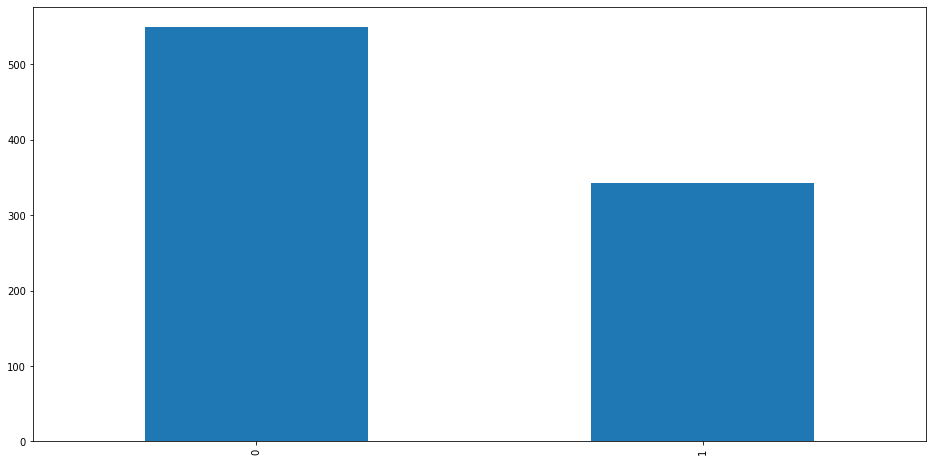

In [8]:
# Number of people survived vs not servived
plt.figure(figsize=(16,8))
data["Survived"].value_counts().plot.bar()
plt.show

In [9]:
non_survived_passenger = round(data["Survived"].value_counts()[0]/len(data)*100,2)
survived_passenger = round(data["Survived"].value_counts()[1]/len(data)*100,2)

In [10]:
print(f"Percentage of passengers survived: {survived_passenger}%")
print(f"Percentage of passengers who could not survived: {non_survived_passenger}%")

Percentage of passengers survived: 38.38%
Percentage of passengers who could not survived: 61.62%


In [11]:
#Maximum and Minimun age of the passengers
print(f"Maximum age is: {data['Age'].max()}")
print(f"Minimum age is: {data['Age'].min()}")

Maximum age is: 80.0
Minimum age is: 0.42


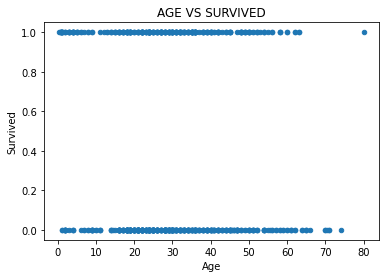

In [12]:
#Univariate Analysis
data.plot(kind="scatter",x="Age",y="Survived")
plt.title("AGE VS SURVIVED")
plt.show()

I did not see any correlations between Age and Survived columns

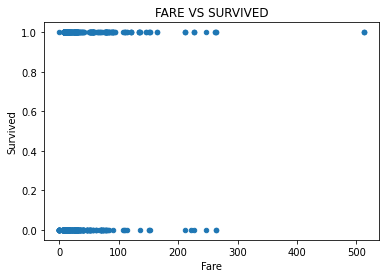

In [13]:
data.plot(kind="scatter", x="Fare", y="Survived")
plt.title("FARE VS SURVIVED")
plt.show()

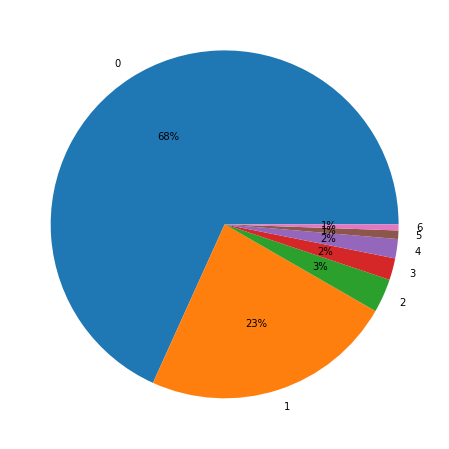

In [14]:
plt.figure(figsize=(16,8))
plt.pie(data["SibSp"].value_counts().values, autopct="%1.0f%%", labels=[0,1,2,3,4,5,6])
plt.show()

<AxesSubplot:>

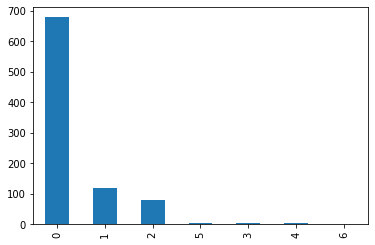

In [15]:
data['Parch'].value_counts().plot.bar()

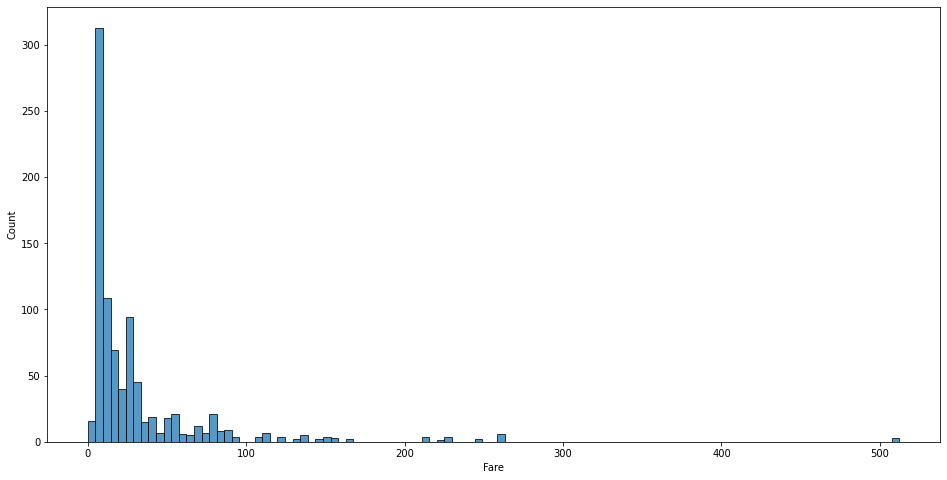

In [16]:
plt.figure(figsize=(16,8))
sns.histplot(data['Fare'])
plt.show()

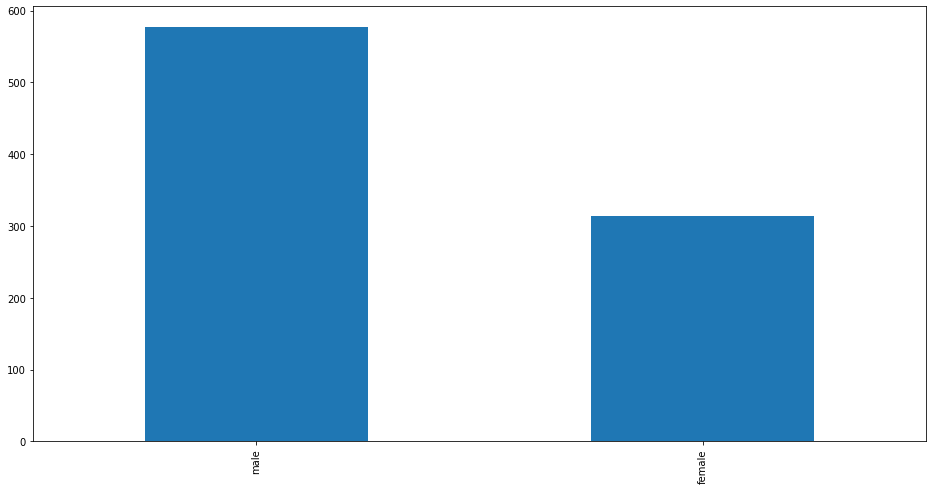

In [17]:
plt.figure(figsize=(16,8))
data["Sex"].value_counts().plot.bar()
plt.show()

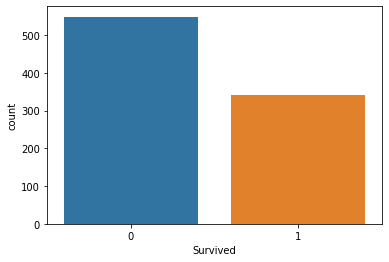

In [18]:
sns.countplot(x='Survived', data=data);

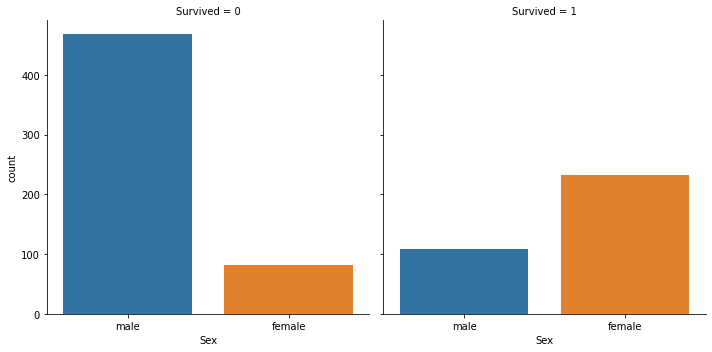

In [19]:
sns.catplot(x='Sex', col='Survived', kind='count', data=data)

In [20]:
print("% of women survived: " , data[data.Sex == 'female'].Survived.sum()/data[data.Sex == 'female'].Survived.count()*100)
print("% of men survived:   " , data[data.Sex == 'male'].Survived.sum()/data[data.Sex == 'male'].Survived.count()*100)

% of women survived:  74.20382165605095
% of men survived:    18.890814558058924


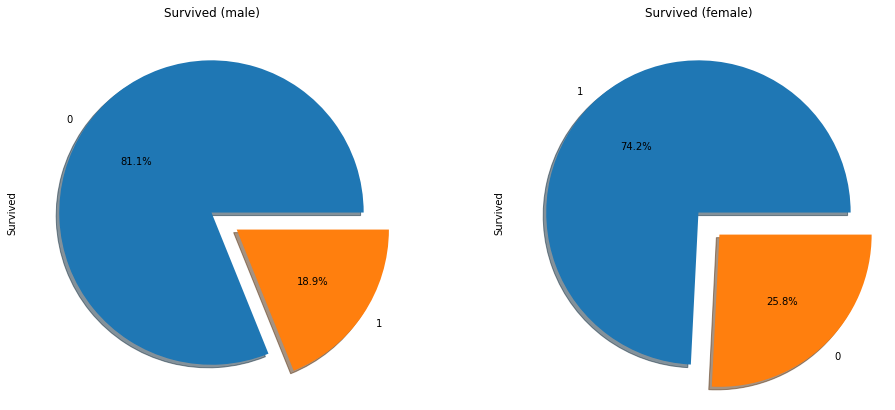

In [21]:
f,ax=plt.subplots(1,2,figsize=(16,7))
data['Survived'][data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data['Survived'][data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [22]:
print("% of survivals in") 
print("Pclass=1 : ", data.Survived[data.Pclass == 1].sum()/data[data.Pclass == 1].Survived.count()*100)
print("Pclass=2 : ", data.Survived[data.Pclass == 2].sum()/data[data.Pclass == 2].Survived.count()*100)
print("Pclass=3 : ", data.Survived[data.Pclass == 3].sum()/data[data.Pclass == 3].Survived.count()*100)

% of survivals in
Pclass=1 :  62.96296296296296
Pclass=2 :  47.28260869565217
Pclass=3 :  24.236252545824847


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


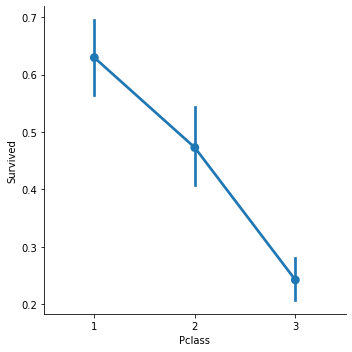

In [23]:
sns.catplot('Pclass','Survived', kind='point', data=data)

In [24]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


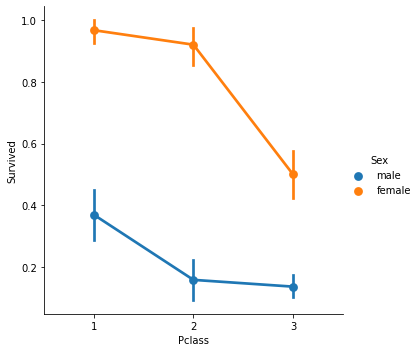

In [25]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=data)

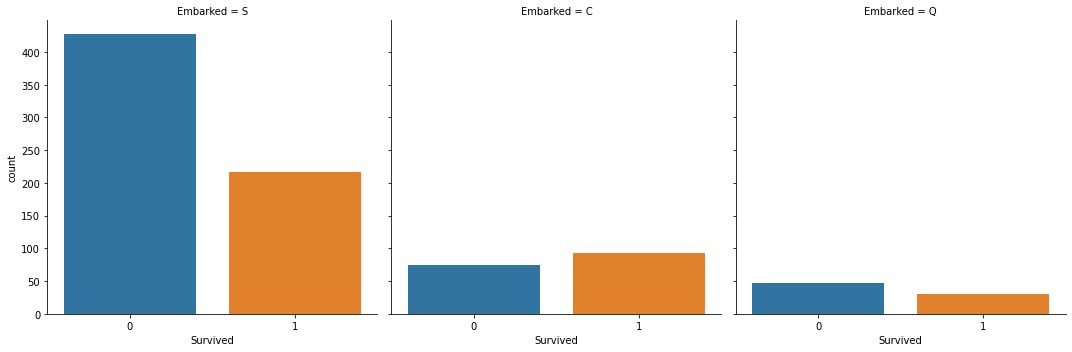

In [26]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data)

In [27]:
pd.crosstab([data.Survived], [data.Sex, data.Pclass, data.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

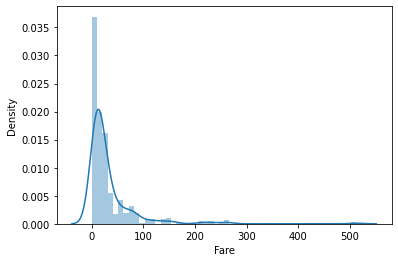

In [28]:
sns.distplot(data['Fare'])

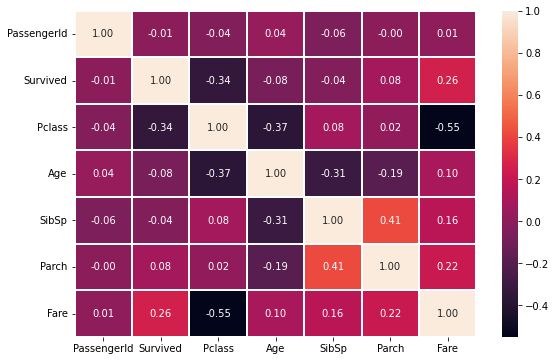

In [29]:
# Correlation Matrix
corr = data.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()